### UDR

Different UDR results.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from env.custom_hopper import *
import gym
from mujoco_py import GlfwContext
import glfw
from stable_baselines3 import SAC

In [3]:
model_u_0 =  SAC.load("SAC-hyper-eval_callback/SAC_steps_1000000_lr_0.001_gamma_0.995_tau_0.01_ent_coef_auto/best_model.zip")

model_u_2 =  SAC.load("SAC-hyper-eval_callback/SAC_steps_1000000_lr_0.001_gamma_0.995_tau_0.01_ent_coef_auto_u_0.2/best_model.zip")

model_u_5 =  SAC.load("SAC-hyper-eval_callback/SAC_steps_1000000_lr_0.001_gamma_0.995_tau_0.01_ent_coef_auto_u_0.5/best_model.zip")

model_u_1 =  SAC.load("SAC-hyper-eval_callback/SAC_steps_1000000_lr_0.001_gamma_0.995_tau_0.01_ent_coef_auto_u_1/best_model.zip")

In [4]:
source_env = gym.make('CustomHopper-source-v0')
target_env = gym.make('CustomHopper-target-v0')

n_episodes = 50
seed = 1234

In [5]:
def get_reward(env, model, n_episodes, seed, verbose = True):
    reward_list = np.array([])

    for i in range(n_episodes):
        done = False
        env.seed(seed + i)
        state = env.reset()
        total_reward = 0
        step_count = 0

        while not done:
            action, _ = model.predict(state, deterministic=True)

            state, reward, done, _ = env.step(action)
            total_reward += reward
            step_count += 1

        if verbose:
            print(f"Episode {i} reward: {total_reward} in total {step_count} steps")

        reward_list = np.append(reward_list, total_reward)

    return (reward_list)

In [6]:
reward_source_u_0 = get_reward(source_env, model_u_0, n_episodes, seed)
reward_source_u_2 = get_reward(source_env, model_u_2, n_episodes, seed)
reward_source_u_5 = get_reward(source_env, model_u_5, n_episodes, seed)
reward_source_u_1 = get_reward(source_env, model_u_1, n_episodes, seed)

Episode 0 reward: 1781.9478135792558 in total 500 steps
Episode 1 reward: 1780.2969346486295 in total 500 steps
Episode 2 reward: 1791.2636629644537 in total 500 steps
Episode 3 reward: 1773.5670059450356 in total 500 steps
Episode 4 reward: 1774.0276487043404 in total 500 steps
Episode 5 reward: 1791.7626537212425 in total 500 steps
Episode 6 reward: 1779.6766214766058 in total 500 steps
Episode 7 reward: 1771.0222669686707 in total 500 steps
Episode 8 reward: 1777.1211509834282 in total 500 steps
Episode 9 reward: 1794.384522541707 in total 500 steps
Episode 10 reward: 1793.40090612902 in total 500 steps
Episode 11 reward: 1766.50861126088 in total 500 steps
Episode 12 reward: 1792.2605980091562 in total 500 steps
Episode 13 reward: 1793.4228324110115 in total 500 steps
Episode 14 reward: 1778.4291381395099 in total 500 steps
Episode 15 reward: 1777.8289562162427 in total 500 steps
Episode 16 reward: 1777.8067945005384 in total 500 steps
Episode 17 reward: 1775.9580524036458 in total

In [7]:
reward_target_u_0 = get_reward(target_env, model_u_0, n_episodes, seed)
reward_target_u_2 = get_reward(target_env, model_u_2, n_episodes, seed)
reward_target_u_5 = get_reward(target_env, model_u_5, n_episodes, seed)
reward_target_u_1 = get_reward(target_env, model_u_1, n_episodes, seed)


Episode 0 reward: 1737.924944552002 in total 500 steps
Episode 1 reward: 1715.2586520108725 in total 500 steps
Episode 2 reward: 1734.4208649048364 in total 500 steps
Episode 3 reward: 1680.9182514071317 in total 500 steps
Episode 4 reward: 1651.168146727966 in total 500 steps
Episode 5 reward: 1156.632436248003 in total 323 steps
Episode 6 reward: 1074.680711688498 in total 305 steps
Episode 7 reward: 1071.666228773046 in total 305 steps
Episode 8 reward: 1659.3520755680145 in total 500 steps
Episode 9 reward: 1102.168882765977 in total 313 steps
Episode 10 reward: 1071.8693837013618 in total 304 steps
Episode 11 reward: 1090.8051003792975 in total 311 steps
Episode 12 reward: 1035.6880909837423 in total 295 steps
Episode 13 reward: 1036.0965600868228 in total 296 steps
Episode 14 reward: 1680.6069223089464 in total 500 steps
Episode 15 reward: 1712.7939497706402 in total 500 steps
Episode 16 reward: 1026.465524984499 in total 296 steps
Episode 17 reward: 1732.5003748435684 in total 5

In [8]:
print(f"source_env reward u_0: {round(reward_source_u_0.mean())} +/- {round(reward_source_u_0.std())}")
print(f"source_env reward u_2: {round(reward_source_u_2.mean())} +/- {round(reward_source_u_2.std())}")
print(f"source_env reward u_5: {round(reward_source_u_5.mean())} +/- {round(reward_source_u_5.std())}")
print(f"source_env reward u_1: {round(reward_source_u_1.mean())} +/- {round(reward_source_u_1.std())}")

print(f"target_env reward u_0: {round(reward_target_u_0.mean())} +/- {round(reward_target_u_0.std())}")
print(f"target_env reward u_2: {round(reward_target_u_2.mean())} +/- {round(reward_target_u_2.std())}")
print(f"target_env reward u_5: {round(reward_target_u_5.mean())} +/- {round(reward_target_u_5.std())}")
print(f"target_env reward u_1: {round(reward_target_u_1.mean())} +/- {round(reward_target_u_1.std())}")



source_env reward u_0: 1781 +/- 7
source_env reward u_2: 1726 +/- 5
source_env reward u_5: 1612 +/- 2
source_env reward u_1: 1606 +/- 19
target_env reward u_0: 1404 +/- 297
target_env reward u_2: 1301 +/- 136
target_env reward u_5: 1471 +/- 269
target_env reward u_1: 1011 +/- 4


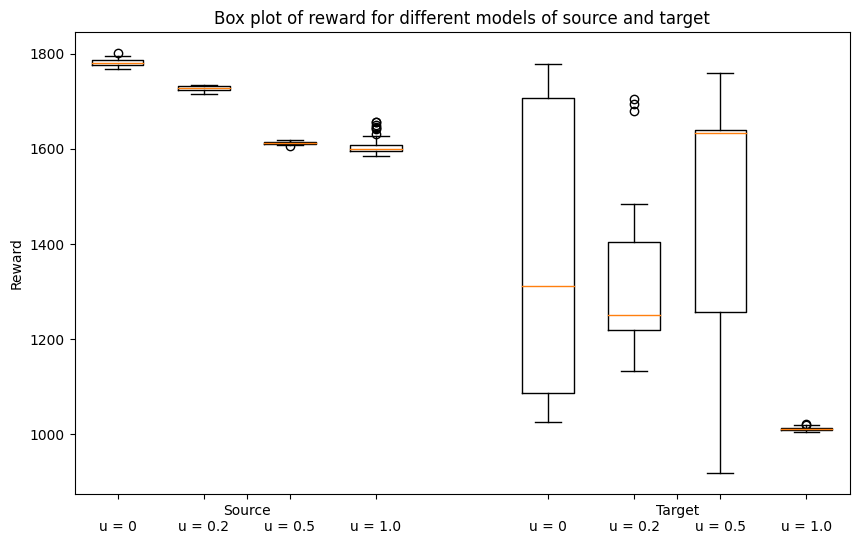

In [19]:
# plot box plot for different models of source and target
plt.figure(figsize=(10, 6))

plt.boxplot([reward_source_u_0, reward_source_u_2, reward_source_u_5, reward_source_u_1], positions=[1, 2, 3, 4], widths=0.6)
plt.boxplot([reward_target_u_0, reward_target_u_2, reward_target_u_5, reward_target_u_1], positions=[6, 7, 8, 9], widths=0.6)

# plt.xticks([2.5], ["sexxxxxxxx"])
plt.xticks([1, 2, 2.5, 3, 4, 6, 7, 7.5, 8, 9], ['\nu = 0', '\nu = 0.2', 'Source', '\nu = 0.5', '\nu = 1.0', '\nu = 0', '\nu = 0.2', 'Target', '\nu = 0.5', '\nu = 1.0'])
plt.ylabel('Reward')
plt.title('Box plot of reward for different models of source and target')
plt.show()

